# Visualizing Twitter comments and newspaper comments from Facebook
## Loading packages, connect to drive and load the datasets


In [ ]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Mount Google Drive to be able to import the needed datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the data

df_nos = pd.read_csv('/content/drive/MyDrive/SE/Smart_Environments/Data_Facebook/Sentiment_Analysis/Sentiment_nos.csv')
df_nu = pd.read_csv('/content/drive/MyDrive/SE/Smart_Environments/Data_Facebook/Sentiment_Analysis/Sentiment_nu.csv')
df_volkskrant = pd.read_csv('/content/drive/MyDrive/SE/Smart_Environments/Data_Facebook/Sentiment_Analysis/Sentiment_volkskrant.csv')
df_twitter = pd.read_csv('/content/drive/MyDrive/SE/Smart_Environments/Data_Twitter/Sentiment_Twitter.csv')



# Total sentiment of Twitter over time (df_twitter)


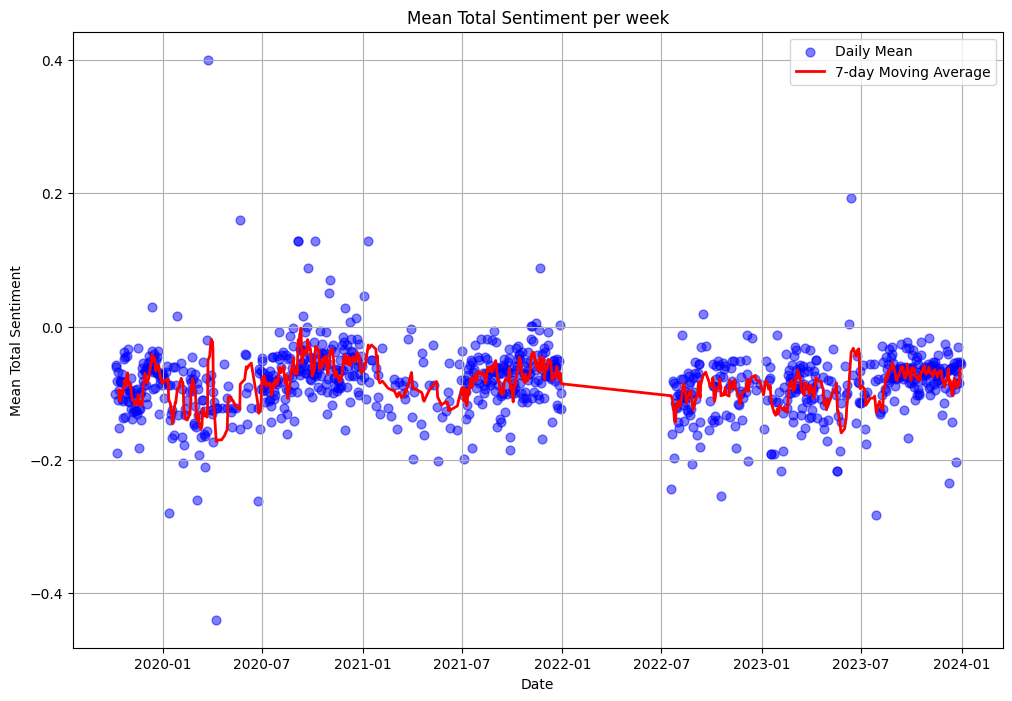

In [ ]:
# Convert timestamp to datetime format
df_twitter['date'] = pd.to_datetime(df_twitter['date'])

# Extract date from timestamp and create a new column 'date'
df_twitter['date'] = df_twitter['date'].dt.date

# Filter data from 2019 onwards and erase outlier lower than -0.5
df_filtered = df_twitter[(df_twitter['date'].dt.year >= 2019) & (df_twitter['total_sentiment'] >= -0.5)]

# Calculate the mean total sentiment per day
mean_sentiment_per_day = df_filtered.groupby('date')['total_sentiment'].mean().reset_index()

# Calculate the 7-day moving average
mean_sentiment_per_day['moving_average'] = mean_sentiment_per_day['total_sentiment'].rolling(window=7).mean()

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(mean_sentiment_per_day['date'], mean_sentiment_per_day['total_sentiment'], marker='o', color='b', s=40, alpha=0.5, label='Daily Mean')
plt.plot(mean_sentiment_per_day['date'], mean_sentiment_per_day['moving_average'], color='r', linestyle='-', linewidth=2, label='7-day Moving Average')

# naming titles and axis
plt.title('Mean Total Sentiment per week')
plt.xlabel('Date')
plt.ylabel('Mean Total Sentiment')
plt.legend()
plt.grid(True)

# saving scatterplot to drive
plt.savefig('/content/drive/MyDrive/SE/Smart_Environments/Visualization/Total_Sentiment_of_Twitter_Over_Time.jpeg')
plt.show()

# Visualising Facebook with Boxplots
1. NOS posts (9)
2. Nu posts (11)
3. Volkskrant posts (5)
4. NOS, NU, Volkskrant compared


### 1. NOS posts (9)


In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

<ipython-input-20-32c36242e600>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='post', y='total_sentiment', data=df_nos, palette='tab10')


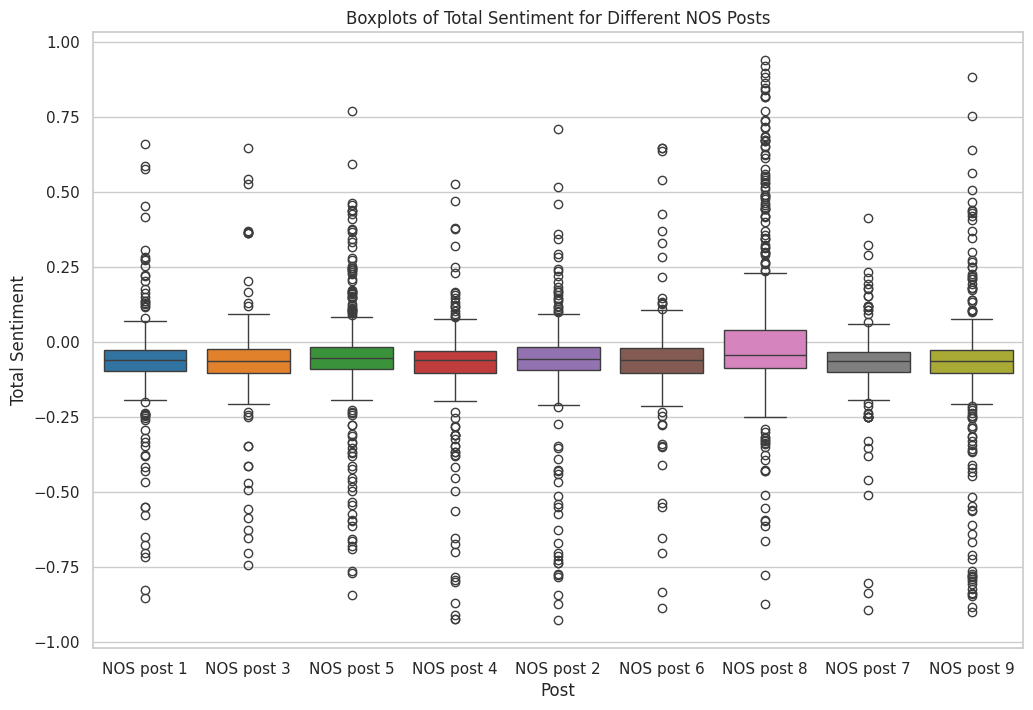

In [ ]:
# Create a boxplot for each post
plt.figure(figsize=(12, 8))
sns.boxplot(x='post', y='total_sentiment', data=df_nos, palette='tab10')

# naming title and axis
plt.title('Boxplots of Total Sentiment for Different NOS Posts')
plt.xlabel('Post')
plt.ylabel('Total Sentiment')

# saving boxplot to drive
plt.savefig('/content/drive/MyDrive/SE/Smart_Environments/Visualization/NOS posts Boxplots.jpeg')
plt.show()


### 2. Nu posts (11)


<ipython-input-21-c2732f4ee5dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='post', y='total_sentiment', data=df_nu, palette='tab10')


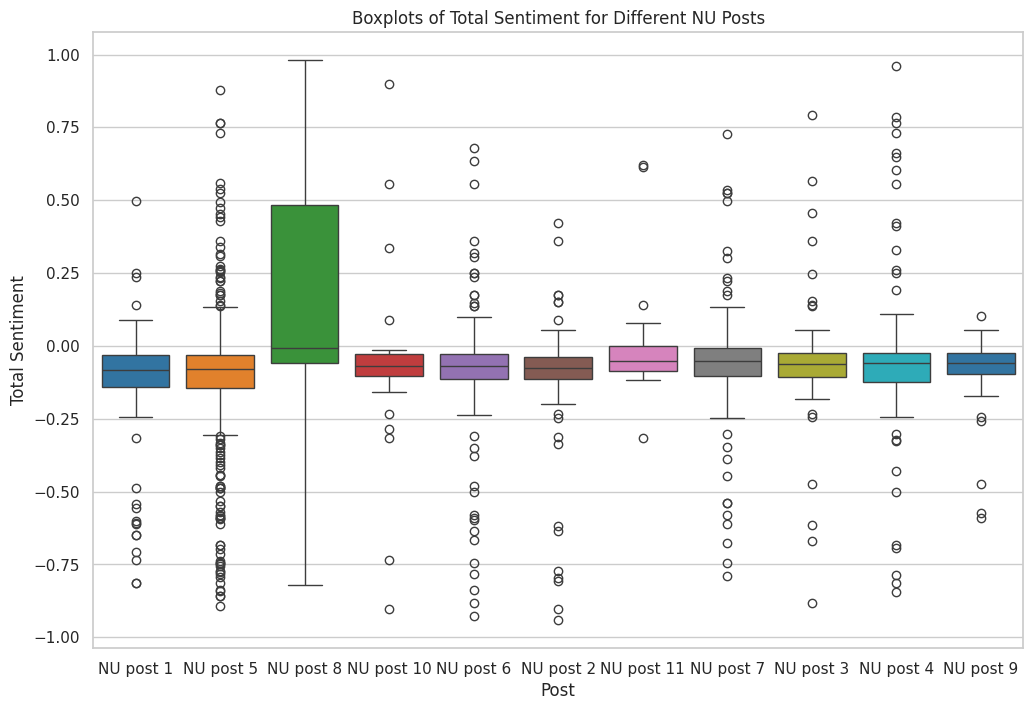

In [ ]:
# Create a boxplot for each post
plt.figure(figsize=(12, 8))
sns.boxplot(x='post', y='total_sentiment', data=df_nu, palette='tab10')
plt.title('Boxplots of Total Sentiment for Different NU Posts')
plt.xlabel('Post')
plt.ylabel('Total Sentiment')
plt.savefig('/content/drive/MyDrive/SE/Smart_Environments/Visualization/Nu_posts_Boxplots.jpeg')
plt.show()


### 3. Volkskrant posts (5)


<ipython-input-22-0874f9795ca8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='post', y='total_sentiment', data=df_volkskrant, palette='tab10')


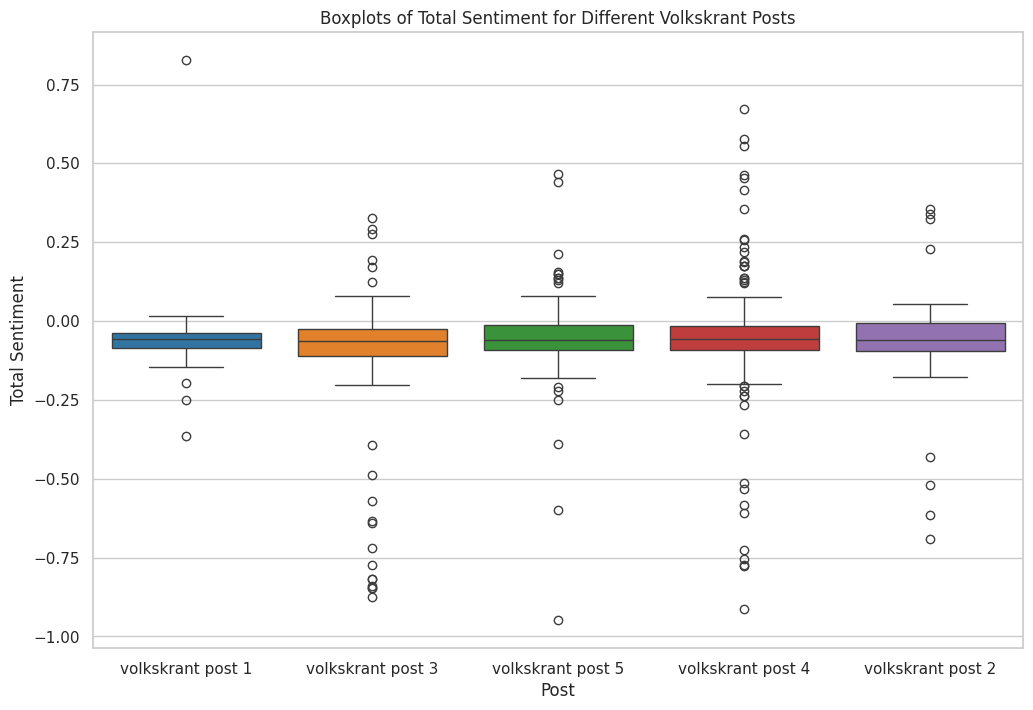

In [ ]:
# Create a boxplot for each post
plt.figure(figsize=(12, 8))
sns.boxplot(x='post', y='total_sentiment', data=df_volkskrant, palette='tab10')
plt.title('Boxplots of Total Sentiment for Different Volkskrant Posts')
plt.ylabel('Total Sentiment')
plt.xlabel('Post')
plt.savefig('/content/drive/MyDrive/SE/Smart_Environments/Visualization/Volkskrant_posts_Boxplots.jpeg')
plt.show()


### 4. NOS, NU, Volkskrant compared

In [ ]:
# Combine the datasets
df_facebook = pd.concat([df_nos.assign(dataset='NOS'), df_nu.assign(dataset='NU'), df_volkskrant.assign(dataset='Volkskrant')])

<ipython-input-24-b580962ba432>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dataset', y='total_sentiment', data=df_facebook, palette='tab10')


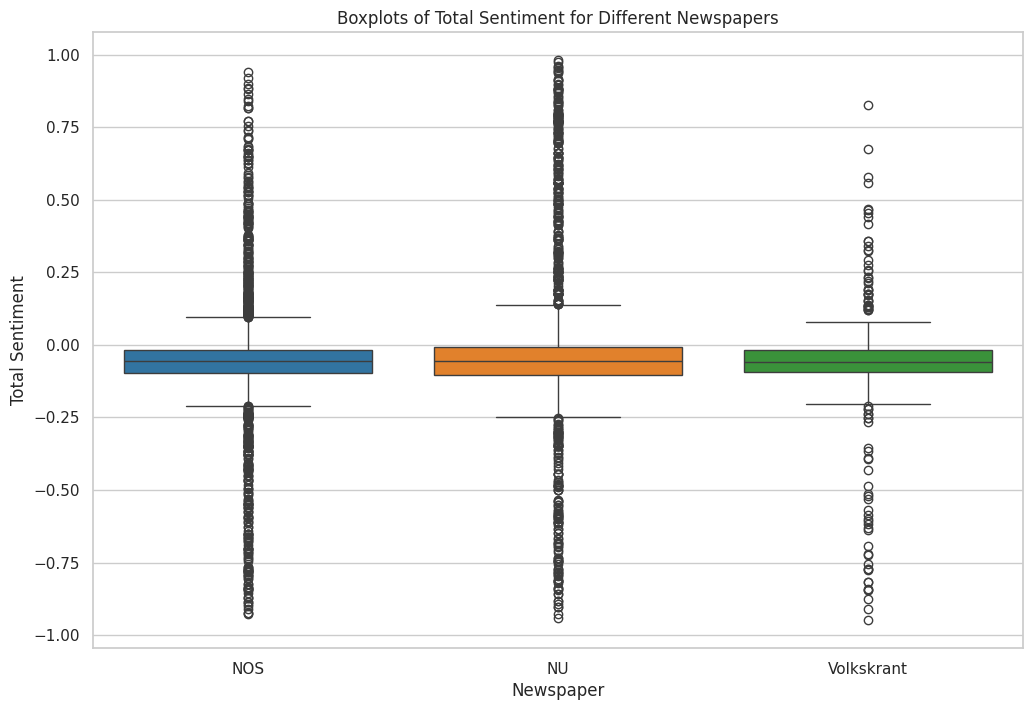

In [ ]:
# Create a boxplot for each dataset
plt.figure(figsize=(12, 8))
sns.boxplot(x='dataset', y='total_sentiment', data=df_facebook, palette='tab10')
plt.title('Boxplots of Total Sentiment for Different Newspapers')
plt.xlabel('Newspaper')
plt.ylabel('Total Sentiment')
plt.savefig('/content/drive/MyDrive/SE/Smart_Environments/Visualization/Different_Newspapers_Boxplots.jpeg')
plt.show()


# Total Sentiment comparison Facebook and Twitter (Boxplots)



In [ ]:
# Combine the datasets
df_facebook['Dataset'] = 'df_facebook'
df_twitter['Dataset'] = 'df_twitter'
df_twitter_facebook = pd.concat([df_facebook, df_twitter])

<ipython-input-26-7eea01a4b490>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='total_sentiment', data=df_twitter_facebook, palette='tab10')


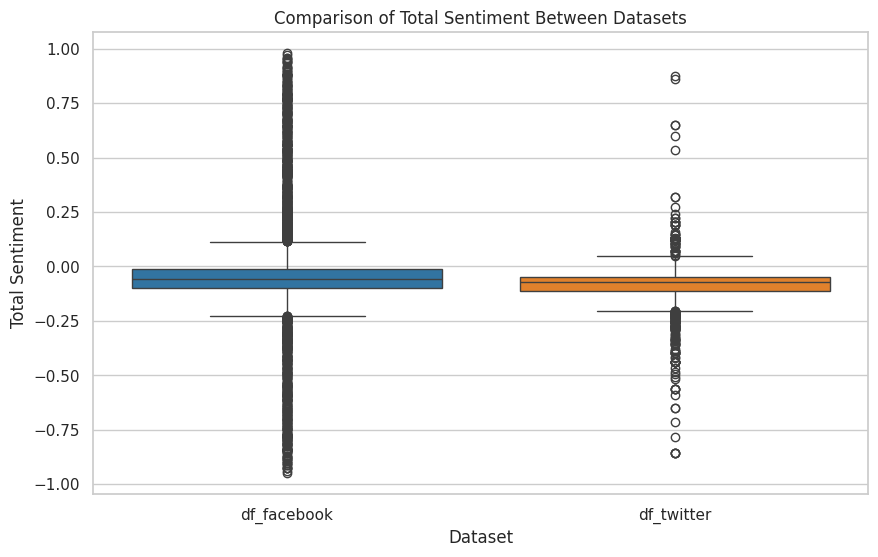

In [ ]:
# Create a boxplot for the 'total_sentiment' column grouped by 'Dataset'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='total_sentiment', data=df_twitter_facebook, palette='tab10')
plt.title('Comparison of Total Sentiment Between Datasets')
plt.xlabel('Dataset')
plt.ylabel('Total Sentiment')
plt.savefig('/content/drive/MyDrive/SE/Smart_Environments/Visualization/Facebook_and_Twitter_boxplots.jpeg')
plt.show()


In [ ]:
# calculate mean and median
means = df_twitter_facebook.groupby('Dataset')['total_sentiment'].mean()
medians = df_twitter_facebook.groupby('Dataset')['total_sentiment'].median()

# Display the results
print("Mean Total Sentiment:")
print(means)
print("\nMedian Total Sentiment:")
print(medians)

Mean Total Sentiment:
Dataset
df_facebook   -0.042570
df_twitter    -0.080215
Name: total_sentiment, dtype: float64

Median Total Sentiment:
Dataset
df_facebook   -0.057176
df_twitter    -0.072577
Name: total_sentiment, dtype: float64
